In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# from sklearn.

In [167]:
hr = pd.read_csv("aug_train.csv")
hr_test = pd.read_csv("aug_test.csv")

In [168]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [169]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [170]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [171]:
hr.sort_values(by="gender")[["target"]]

,target
7580,1.0
16742,0.0
16744,0.0
11910,0.0
16752,0.0
...,...
19140,0.0
19144,1.0
19145,0.0
19148,1.0


In [172]:
hr.groupby(by="gender")[["target"]].sum()

,target
gender,
Female,326.0
Male,3012.0
Other,50.0


In [173]:
hr.value_counts("gender", normalize=True)

gender
Male      0.902457
Female    0.084505
Other     0.013038
dtype: float64

In [174]:
hr.query("company_type !=  company_type & company_size != company_size").isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    1473
relevent_experience          0
enrolled_university        217
education_level            278
major_discipline          1553
experience                  20
company_size              5360
company_type              5360
last_new_job               193
training_hours               0
target                       0
dtype: int64

In [175]:
# define features

In [176]:
# hr.query("")

<AxesSubplot:xlabel='gender', ylabel='count'>

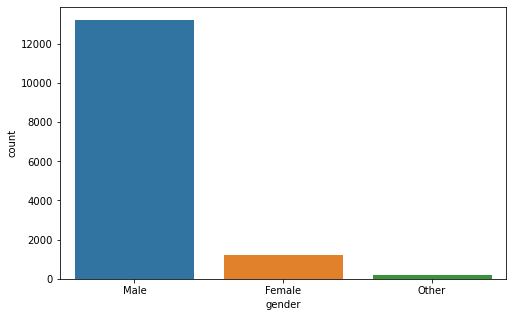

In [177]:
plt.figure(figsize=(8,5))
sns.countplot(x="gender", data=hr)

In [178]:
hr.groupby("gender")["target"].sum()

gender
Female     326.0
Male      3012.0
Other       50.0
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

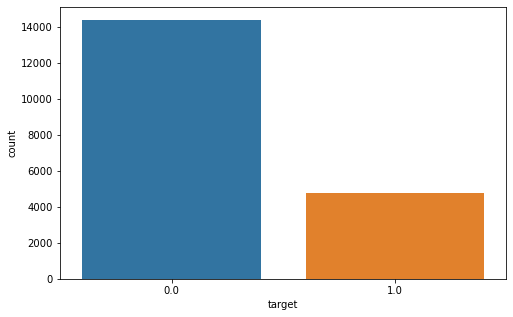

In [179]:
plt.figure(figsize=(8,5))
sns.countplot(x="target", data=hr)

In [180]:
drop_col = ["enrollee_id", "city", "experience", "target" ]

In [181]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [182]:
hr.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [183]:
categorical = [cname for cname in hr.columns if hr[cname].dtype == "object" and hr[cname].nunique() <= 10]

In [184]:
categorical

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'last_new_job']

In [185]:
#hr.query('experience == ">20"')
def replaced(col):
    for x in (hr[col]):
        if x == '>20':
            return "20"
        elif x == "<1":
            return "1"
        else:
            return x


In [186]:
hr['experience'].apply(replaced)

KeyError: '>20'

In [187]:
hr["experience"].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [188]:
city_development_index

NameError: name 'city_development_index' is not defined

In [189]:
si_c = SimpleImputer(strategy="most_frequent")
ohe = OneHotEncoder()

In [190]:
cat_transform = Pipeline(steps=[("impute", si_c), ("encode", ohe)])
preprocessor = ColumnTransformer(transformers=[("trans", cat_transform, categorical)], remainder="passthrough")

In [191]:
r_model = RandomForestClassifier()
x_model = XGBClassifier()
t_model = DecisionTreeClassifier()
c_model = CatBoostClassifier(auto_class_weights= "Balanced")
l_model = LogisticRegression()

In [192]:
my_pipe = Pipeline(steps=[("process", preprocessor),
                  ("xgboost",r_model)])

In [193]:
X = hr.drop(drop_col, axis=1)
y = hr.target

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=10)

In [194]:
X_train.shape

(14368, 10)

In [195]:
y_train.shape

(14368,)

In [196]:
my_pipe.fit(X_train, y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trans',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder())]),
                                                  ['gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type',
                   

In [197]:
r_pred = my_pipe.predict(X_test)

In [198]:
r_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [199]:
print(classification_report(y_test, r_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      3607
         1.0       0.49      0.40      0.44      1183

    accuracy                           0.75      4790
   macro avg       0.65      0.63      0.64      4790
weighted avg       0.74      0.75      0.74      4790



In [200]:
def pipe(model, X=X_train, y=y_train, X_test1=X_test, y_test1=y_test):
    my_pipe = Pipeline(steps=[("process", preprocessor),
                  ("a_model",model)])
    my_pipe.fit(X, y)
    pred = my_pipe.predict(X_test1)
    print(classification_report(y_test1, pred))
    
    
    

In [202]:
pipe(x_model)

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      3607
         1.0       0.56      0.42      0.48      1183

    accuracy                           0.78      4790
   macro avg       0.69      0.66      0.67      4790
weighted avg       0.76      0.78      0.76      4790



In [203]:
pipe(t_model)

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      3607
         1.0       0.43      0.43      0.43      1183

    accuracy                           0.72      4790
   macro avg       0.62      0.62      0.62      4790
weighted avg       0.72      0.72      0.72      4790



In [204]:
pipe(l_model)

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      3607
         1.0       0.58      0.26      0.36      1183

    accuracy                           0.77      4790
   macro avg       0.69      0.60      0.61      4790
weighted avg       0.74      0.77      0.74      4790



C:\Users\user1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
pipe(c_model)

Learning rate set to 0.032147
0:	learn: 0.6862364	total: 2.38ms	remaining: 2.37s
1:	learn: 0.6787055	total: 6.26ms	remaining: 3.12s
2:	learn: 0.6720864	total: 18ms	remaining: 5.98s
3:	learn: 0.6652453	total: 21.9ms	remaining: 5.46s
4:	learn: 0.6590752	total: 34.8ms	remaining: 6.93s
5:	learn: 0.6534020	total: 50.4ms	remaining: 8.34s
6:	learn: 0.6481910	total: 54.4ms	remaining: 7.72s
7:	learn: 0.6429790	total: 58.5ms	remaining: 7.25s
8:	learn: 0.6386160	total: 62.7ms	remaining: 6.9s
9:	learn: 0.6338985	total: 67.2ms	remaining: 6.65s
10:	learn: 0.6297012	total: 81.2ms	remaining: 7.3s
11:	learn: 0.6267863	total: 83.5ms	remaining: 6.87s
12:	learn: 0.6235761	total: 86.2ms	remaining: 6.55s
13:	learn: 0.6199684	total: 89.9ms	remaining: 6.33s
14:	learn: 0.6168813	total: 96.3ms	remaining: 6.32s
15:	learn: 0.6138464	total: 113ms	remaining: 6.92s
16:	learn: 0.6109111	total: 116ms	remaining: 6.73s
17:	learn: 0.6082792	total: 120ms	remaining: 6.56s
18:	learn: 0.6061785	total: 126ms	remaining: 6.53s


In [206]:
# drop_col = ["enrollee_id", "city", "experience", "target" ]

In [207]:
drop_col = drop_col[:-1]

In [208]:
X = hr_test.drop(drop_col, axis=1)

In [209]:
cal_pred = my_pipe.predict(X)

In [210]:
cal_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [211]:
df = hr_test[["enrollee_id"]]

In [212]:
df["target"] = cal_pred

<ipython-input-212-227a88d0eb41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = cal_pred


In [213]:
df

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,0.0
3,27385,0.0
4,27724,0.0
...,...,...
2124,1289,0.0
2125,195,0.0
2126,31762,0.0
2127,7873,0.0


In [155]:
df.to_csv("hr_predictions.csv", index=False)

In [216]:
ohe.fit_transform(X_train[['gender']])

<14368x4 sparse matrix of type '<class 'numpy.float64'>'
	with 14368 stored elements in Compressed Sparse Row format>

In [222]:
hr.gender.mode()

0    Male
dtype: object

In [223]:
hr["genders"] = hr["gender"].fillna(hr.gender.mode())

In [224]:
pd.get_dummies(data=hr, columns=["genders"], drop_first=True)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,genders_Male,genders_Other
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,1,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,1,0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,1,0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,1,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,1,0


In [ ]:
def exp_range()